<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/Alexnet_Architecture_with_Intel_Image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

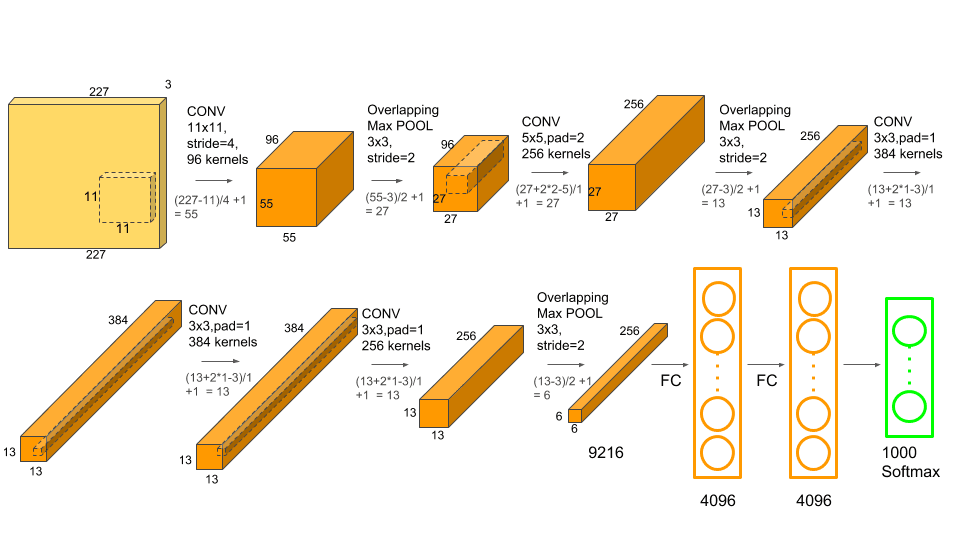

Typical Alexnet Architecture

Source: https://www.kaggle.com/code/blurredmachine/alexnet-architecture-a-complete-guide

In [ ]:
# Importing all dependencies
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os

In [ ]:
def AlexNet(input_shape): # Building the Alexnet Nural Network
    
  X_input = Input(input_shape) # Shape of the Image

  # 1st Convolutional Layer  
  X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
  # Batch Normalisation before passing it to the next layer
  X = BatchNormalization(axis = 3 , name = "bn0")(X)
  X = Activation('relu')(X)
  
  # Pooling   
  X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
  
  # 2nd Convolutional Layer
  X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
  # Batch Normalisation before passing it to the next layer
  X = BatchNormalization(axis = 3 ,name='bn1')(X)
  X = Activation('relu')(X)

  # Pooling  
  X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
  # 3rd Convolutional Layer
  X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
  # Batch Normalisation before passing it to the next layer
  X = BatchNormalization(axis = 3, name = 'bn2')(X)
  X = Activation('relu')(X)
  
  # 4th Convolutional Layer
  X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
  # Batch Normalisation before passing it to the next layer
  X = BatchNormalization(axis = 3, name = 'bn3')(X)
  X = Activation('relu')(X)
  
  # 5th Convolutional Layer
  X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
  # Batch Normalisation before passing it to the next layer
  X = BatchNormalization(axis = 3, name = 'bn4')(X)
  X = Activation('relu')(X)
    
  # Pooling
  X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)

  # Passing it to a dense layer  
  X = Flatten()(X)
  
  # 1st Dense Layer
  X = Dense(4096, activation = 'relu', name = "fc0")(X)
  X = Dropout(0.4)(X)
  # Batch Normalisation
  X = BatchNormalization()(X)

  # 2nd Dense Layer  
  X = Dense(4096, activation = 'relu', name = 'fc1')(X)
  X = Dropout(0.4)(X)
  # Batch Normalisation
  X = BatchNormalization()(X)
    
  X = Dense(6,activation='softmax',name = 'fc2')(X)
    
  model = Model(inputs = X_input, outputs = X, name='AlexNet')
  return model

The Intel Image use case dataset contains around 25k images of size 150x150 distributed under 6 categories, namely : ‘buildings’ , ‘forest’ , ‘glacier’ , ‘mountain’ , ‘sea’ , ‘street’ . There are 14K images in training set, 3K in test setand 7K in Prediction set.

The data images for all the categories are split into it’s respective directories train, test and pred respectively, thus making it easy to infer the labels

The dataset can be assessed via kaggle website : https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # Download the json file from your kaggle profile to use the kaggle api in your notebook
     

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 343M/346M [00:10<00:00, 37.9MB/s]
100% 346M/346M [00:10<00:00, 35.5MB/s]


In [ ]:
dataset = '/content/intel-image-classification.zip'
from zipfile import ZipFile
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#import os
#import shutil

#os.listdir("/content/seg_train") #First find where the ".ipynb_checkpoints" is located.

#shutil.rmtree("directory_where_.ipynb_checkpoints_is_located/.ipynb_checkpoints") #be careful with shutil.rmtree() because it deletes every tree in that path. In other words, do not make mistakes.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train = train_datagen.flow_from_directory('/content/seg_train/seg_train', target_size=(227,227),
                                          shuffle = True,
                                          class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 6)
Image Size of first image :  (227, 227, 3)
Output of first image :  (6,)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory('/content/seg_test/seg_test', target_size=(227,227), class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory('/content/seg_pred', target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 7301 images belonging to 1 classes.


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 1. 0. 0. 0.]')

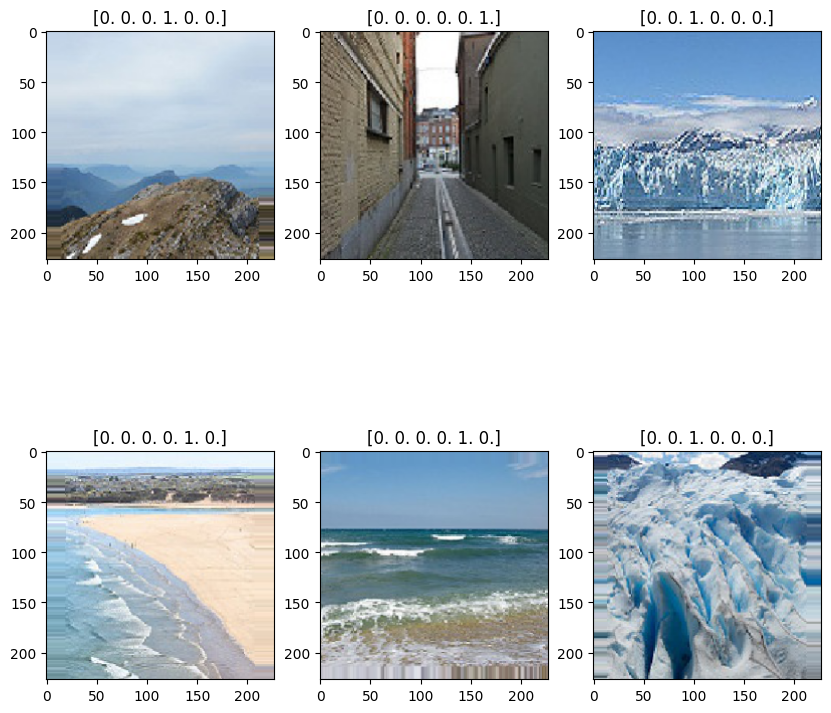

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
alex = AlexNet(train[0][0].shape[1:]) # Using the Alexnet Neural Network on the train dataset

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])
alex.fit(train,epochs=50)

Epoch 1/50
439/439 [==============================] - 181s 401ms/step - loss: 0.4222 - accuracy: 0.8546
Epoch 2/50
439/439 [==============================] - 176s 400ms/step - loss: 0.3917 - accuracy: 0.8620
Epoch 3/50
439/439 [==============================] - 176s 400ms/step - loss: 0.4169 - accuracy: 0.8561
Epoch 4/50
439/439 [==============================] - 174s 396ms/step - loss: 0.3698 - accuracy: 0.8729
Epoch 5/50
439/439 [==============================] - 170s 387ms/step - loss: 0.4049 - accuracy: 0.8576
Epoch 6/50
439/439 [==============================] - 170s 387ms/step - loss: 0.3754 - accuracy: 0.8697
Epoch 7/50
439/439 [==============================] - 171s 388ms/step - loss: 0.3501 - accuracy: 0.8778
Epoch 8/50
439/439 [==============================] - 171s 389ms/step - loss: 0.3265 - accuracy: 0.8886
Epoch 9/50
439/439 [==============================] - 169s 386ms/step - loss: 0.3265 - accuracy: 0.8871
Epoch 10/50
439/439 [==============================] - 170s 388m

In [ ]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

<ipython-input-22-84d1fdb557f3>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = alex.evaluate_generator(test)


Loss = 4.144035339355469
Test Accuracy = 0.8353333473205566


In [ ]:
predictions = alex.predict_generator(predict)

<ipython-input-23-fab3314c5a95>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = alex.predict_generator(predict)


In [ ]:
print(predictions[700])

In [ ]:
print(np.argmax(predictions[700]))

In [ ]:
print(os.listdir('/content/seg_train/seg_train')[np.argmax(predictions[700])])

glacier


In [ ]:
for i in range(7301):
  print(os.listdir('/content/seg_train/seg_train')[np.argmax(predictions[i])])

Streaming output truncated to the last 5000 lines.
buildings
buildings
buildings
street
sea
sea
forest
mountain
street
forest
buildings
sea
forest
sea
mountain
street
sea
sea
forest
sea
sea
buildings
sea
forest
mountain
glacier
street
street
buildings
buildings
forest
sea
glacier
glacier
buildings
sea
street
glacier
sea
mountain
mountain
forest
buildings
sea
buildings
glacier
buildings
mountain
sea
street
street
sea
buildings
street
street
mountain
forest
street
buildings
street
sea
forest
glacier
street
sea
mountain
buildings
buildings
mountain
glacier
buildings
buildings
sea
sea
forest
street
sea
sea
buildings
glacier
sea
forest
mountain
buildings
sea
street
mountain
buildings
sea
glacier
buildings
sea
sea
buildings
street
glacier
street
sea
sea
sea
glacier
buildings
forest
mountain
buildings
forest
mountain
street
mountain
sea
buildings
street
sea
buildings
glacier
mountain
buildings
glacier
street
mountain
mountain
street
street
glacier
mountain
sea
buildings
sea
buildings
sea
stre